<h1><center>TT Lab Project</center></h1>

Presented By members of Group 14:<br>
    Adarsh Kumar (1805695)<br>
    Vaibhav (1805719)

<b>Project Link:</b> <a href="https://blr-house-price-prediction.herokuapp.com/">Click Here to test the Web App!</a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#For evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [2]:
#loading dataset
data = pd.read_csv('Train.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Getting an overview of datatypes and NULL values of different attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
#Getting an statistical overview of the dataset.
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
#Counting the no of NULL values present in the dataset.
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

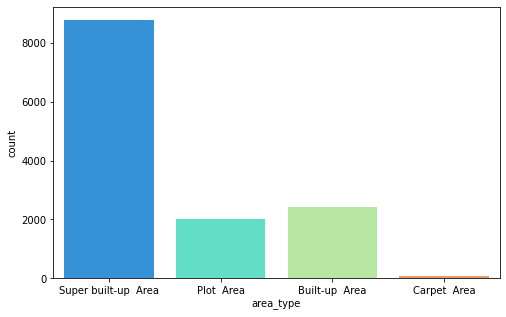

In [6]:
#Plot to find the frequency of Area Type
plt.figure(figsize=(8,5))
sns.countplot( x='area_type', data=data, palette="rainbow")
plt.show()

The above graph depicts that:
1. Most of the houses are in Super built-up Area followed by Built-Up area, Plot Area.
2. There is least no of houses in the Carpet Area

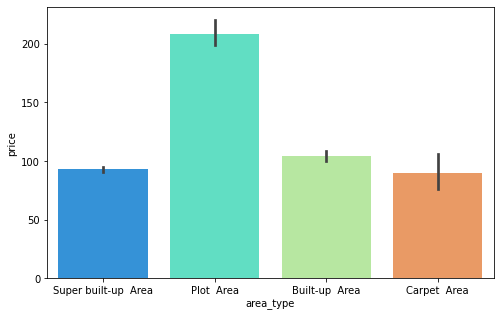

In [7]:
#Plot to find the relationship between the Price and Area Type
plt.figure(figsize=(8,5))
sns.barplot( x='area_type', y='price', data=data, palette="rainbow")
plt.show()

The above graph depicts that:
1. Plot Area is most expensive.
2. Carpet Area and Super Built-Up Area are less expensive.


In [8]:
#Getting the dimension of the dataset
data.shape

(13320, 9)

In [9]:
#Dropping Area Type, Availability and Society from the dataset.
data = data.drop(['area_type','availability','society'],axis=1)
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
data.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
#Imputing balcony with 0 no of balcony
data['balcony'] = data['balcony'].fillna(0)
data = data.dropna()

In [12]:
#Getting the shape of data
data.shape

(13246, 6)

In [13]:
#Extracting the numerical values from Size Column
data['BHK'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
#Dropping the Size column
data = data.drop(['size'],axis=1)
data.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [15]:
data.shape

(13246, 6)

In [16]:
#Creating a function to convert into float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
data[~data['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,0.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [18]:
#Function to convert Square Feet to Numerical Values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [20]:
#Creating a new column for price per square feet
data['price_per_sqft'] = data['price']*100000/data['total_sqft']
data.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


Pre-Processing Location Column

In [21]:
data.location=data.location.apply(lambda x: x.strip())
loc_stats=data.location.value_counts(ascending=False)
loc_stats_less_than_10 = loc_stats[loc_stats>10]

data.location = data.location.apply(lambda x: 'other' if x in (loc_stats_less_than_10) else x)
data.location[data['location']!='other']

9                 Gandhi Bazar
18       Ramakrishnappa Layout
19          Manayata Tech Park
25             Mangammanapalya
42                 Ganga Nagar
                 ...          
13291           Weavers Colony
13292         Udayapur Village
13302     Annaiah Reddy Layout
13306    Rajarajeshwari Nagara
13316            Richards Town
Name: location, Length: 2872, dtype: object

In [22]:
data[data.total_sqft/data.BHK<300].head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,0.0,370.0,6,36274.509804
45,other,600.0,9.0,0.0,200.0,8,33333.333333
58,other,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,2.0,100.0,3,20000.000000


In [23]:
data = data[~(data.total_sqft/data.BHK<300)]

In [24]:
data.shape

(12456, 7)

In [25]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [26]:
#Function to remove Outliers from Price Per Square Feet column
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
data = remove_pps_outliers(data)
data.shape

(10162, 7)

In [27]:
#Function to remove Outliers from BHK column
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data = remove_bhk_outliers(data)
data.shape

(5797, 7)

Text(0, 0.5, 'Count')

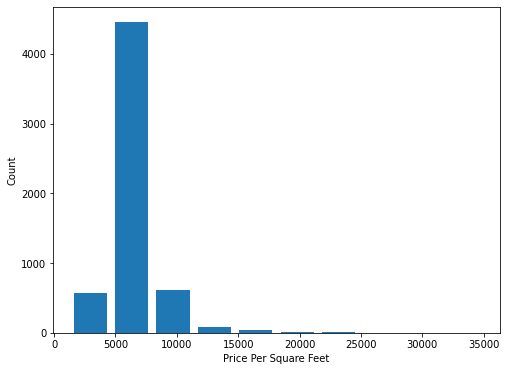

In [28]:
#Plot to count the frequency of the Price Per Square Feet column
plt.subplots(figsize=(8,6))
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [29]:
data = data[data.bath<data.BHK+2]

Text(0, 0.5, 'No. of houses')

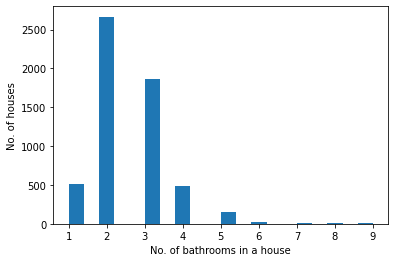

In [30]:
#Plot between the no of bathrooms in a house
plt.hist(data.bath,bins=20)
plt.xlabel('No. of bathrooms in a house')
plt.ylabel('No. of houses')

In [31]:
#Counting the frequency of each location
location_value_count = data['location'].value_counts()
location_value_count

other                    4413
B Narayanapura              8
KUDLU MAIN ROAD             8
Chennammana Kere            8
Basapura                    8
                         ... 
Daadys Gaarden Layout       1
MLA Layout                  1
Veer Sandra                 1
Someshwara Layout           1
Gaurava Nagar               1
Name: location, Length: 521, dtype: int64

In [32]:
location_gert_10 = location_value_count[location_value_count>=10].index
location_gert_10

Index(['other'], dtype='object')

In [34]:
# location count is greter than 10 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)

for cat_var in location_gert_10:
    data['location_'+cat_var]=np.where(data['location']==cat_var, 1,0)
data.shape

(5725, 8)

In [35]:
#Handling Categorical Value
dummies = pd.get_dummies(data.location)
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,location_other,1st Block BEL Layout,1st Block HBR Layout,...,Volagerekallahalli,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1st Block BEL Layout,1540.0,3.0,2.0,85.0,3,5519.480519,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,600.0,1.0,0.0,45.0,1,7500.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,3150.0,4.0,2.0,150.0,4,4761.904762,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,2300.0,3.0,0.0,80.0,3,3478.260870,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block HRBR Layout,1250.0,2.0,1.0,67.0,2,5360.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Dropping Location column after handling the categorical data
data = data.drop('location',axis='columns')

In [37]:
data.head()

,total_sqft,bath,balcony,price,BHK,price_per_sqft,location_other,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Volagerekallahalli,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,2.0,85.0,3,5519.480519,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,0.0,45.0,1,7500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,2.0,150.0,4,4761.904762,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,3.0,0.0,80.0,3,3478.260870,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,1.0,67.0,2,5360.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#Defining X and Y
X = data.drop("price",axis=1)
Y = data.price

In [39]:
#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [40]:
#Training and Predicting on Random Forest Regressor Model
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
rf_score = rfr.score(X_test,Y_test)
print(rf_score)

0.9834412255538343


In [43]:
#function to predict the price of house by taking minimal no of columns
def predict_price(model,location,total_sqft,bath,bhk, balcony):
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if location in X.columns:
        loc_index = np.where(X.columns==location)[0][0]
        x[loc_index] =1

    return model.predict([x])[0]

In [44]:
data.shape

(5725, 527)

Importing the model to a pickle file and deploying it over Heroku.

In [45]:
import joblib
# save model to a pickle file
joblib.dump(rfr, 'bangalore_house_price_prediction_rfr_model.pkl')

['bangalore_house_price_prediction_rfr_model.pkl']

In [46]:
#load pickle file
bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_rfr_model.pkl")

In [47]:
# predict house price
predict_price(bangalore_house_price_prediction_model,location="Devarabeesana Halli", total_sqft=150,bath=3,bhk=3,balcony=3)

11.33